# 1일차 A, B rest_play 군집화

In [20]:
import pandas as pd
import numpy as np

cB_ab=pd.read_csv("D:/Dataset/f_Nirs datasets/1-6 A,B GLM/1st level data/cB.csv")
cB_ab.drop(['Group','Subject'],axis=1,inplace=True)
day1_cB=cB_ab[0:6]
day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


C:\Users\bml05\AppData\Local\Temp\ipykernel_1456\3114346374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


[[0]
 [1]
 [0]
 [0]
 [0]
 [0]]


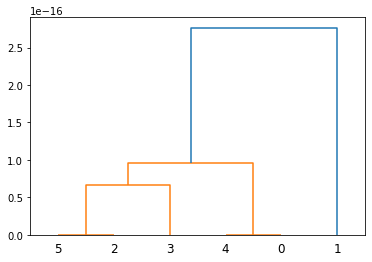

In [35]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

links=linkage(day1_cB,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,2)
print(cluster)